# ARIMA (p,d,q) model 

In [1]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = (9,6)

## Forecasting with ARIMA(p,d,q) 

In [3]:
df = pd.read_csv('data/qauselec.csv', index_col=0)
df.head()

,time,value
1,1956.00,3.923
2,1956.25,4.436
3,1956.50,4.806
4,1956.75,4.418
5,1957.00,4.339


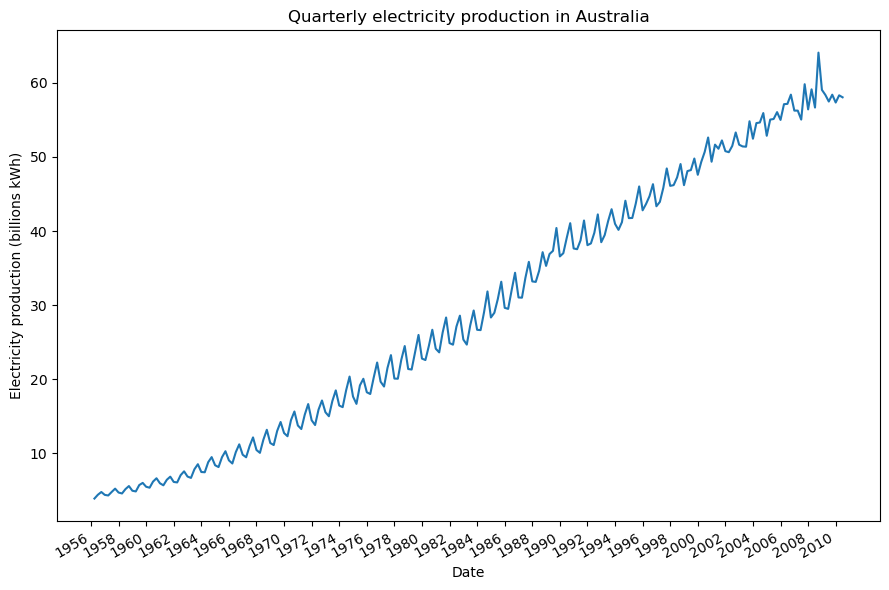

In [4]:
fig, ax = plt.subplots()

ax.plot(df['value'])
ax.set_xlabel('Date')
ax.set_ylabel('Electricity production (billions kWh)')

plt.xticks(np.arange(0, 218, 8), np.arange(1956, 2012, 2))

plt.title('Quarterly electricity production in Australia')

fig.autofmt_xdate()
plt.tight_layout()

### General modling procedure 

#### Find value of *d* 

In [5]:
ad_fuller_result = adfuller(df['value'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: 0.9963277229905594
p-value: 0.9942270502497619


In [6]:
df_diff = np.diff(df['value'], n=1)

ad_fuller_result = adfuller(df_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -3.1727118466027613
p-value: 0.0216195641303748


#### Train/test split 

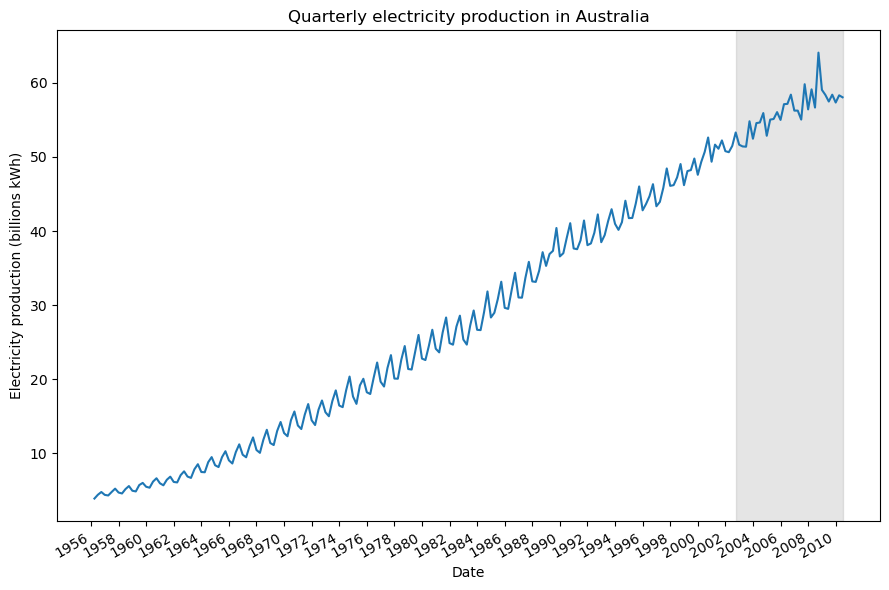

In [7]:
fig, ax = plt.subplots()

ax.plot(df['value'])
ax.set_xlabel('Date')
ax.set_ylabel('Electricity production (billions kWh)')
ax.axvspan(187, 218, color='#808080', alpha=0.2)

plt.xticks(np.arange(0, 218, 8), np.arange(1956, 2012, 2))

plt.title('Quarterly electricity production in Australia')

fig.autofmt_xdate()
plt.tight_layout()

In [8]:
train = df['value'][:-32]
test = df.iloc[-32:]

In [9]:
def ARIMA_gridsearch(endog, min_p, max_p, min_q, max_q, d):
    
    all_p = range(min_p, max_p+1, 1)
    all_q = range(min_q, max_q+1, 1)
    
    all_orders = list(product(all_p, all_q))
    
    print(f'Fitting {len(all_orders)} unique models')
    
    results = []
    
    for order in tqdm_notebook(all_orders):
        try: 
            model = SARIMAX(endog, order=(order[0], d, order[1])).fit()
        except:
            continue
            
        results.append([order, model.aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

#### Model selection with AIC 

In [10]:
result_df = ARIMA_gridsearch(train, 0, 4, 0, 4, 1)
result_df.head()

Fitting 25 unique models


  0%|          | 0/25 [00:00<?, ?it/s]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.98215D+00    |proj g|=  3.03355D-03


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      4      1     0     0   6.303D-06   1.982D+00
  F =   1.9821434096980373     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.88881D+00    |proj g|=  1.16278D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.87584D+00    |proj g|=  2.20534D-02

At iterate   10    f=  1.87556D+00    |proj g|=  2.26885D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     12      1     0     0   2.269D-07   1.876D+00
  F =   1.8755641777445817     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.88767D+00    |proj g|=  2.69931D-01

At iterate    5    f=  1.84649D+00    |proj g|=  5.81577D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.73798D+00    |proj g|=  2.94717D-01

At iterate    5    f=  1.47725D+00    |proj g|=  4.26344D-02

At iterate   10    f=  1.47036D+00    |proj g|=  2.46316D-02

At iterate   15    f=  1.46974D+00    |proj g|=  4.16719D-02

At iterate   20    f=  1.46905D+00    |proj g|=  5.34972D-04

At iterate   25    f=  1.46904D+00    |proj g|=  4.09328D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     33      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  1.96363D+00    |proj g|=  3.07940D-03

At iterate   30    f=  1.96337D+00    |proj g|=  2.61995D-04

At iterate   35    f=  1.96331D+00    |proj g|=  1.64428D-03

At iterate   40    f=  1.96328D+00    |proj g|=  6.23552D-04

At iterate   45    f=  1.96327D+00    |proj g|=  2.43520D-04

At iterate   50    f=  1.96327D+00    |proj g|=  3.93684D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     60      1     0     0   3.937D-04   1.963D+00
  F =   1.9632692091317967     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  1.48699D+00    |proj g|=  3.51337D-01

At iterate   10    f=  1.35820D+00    |proj g|=  1.65592D-01

At iterate   15    f=  1.29500D+00    |proj g|=  3.58929D-01

At iterate   20    f=  1.28736D+00    |proj g|=  2.09437D-02

At iterate   25    f=  1.28733D+00    |proj g|=  4.25231D-02

At iterate   30    f=  1.28532D+00    |proj g|=  6.03305D-01

At iterate   35    f=  1.28388D+00    |proj g|=  9.73848D-02

At iterate   40    f=  1.28375D+00    |proj g|=  3.48744D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     49      1     0     0   1.919D-05   1.284D+00
  F =   1.28374477875

 This problem is unconstrained.



At iterate   25    f=  1.23509D+00    |proj g|=  1.04109D-01

At iterate   30    f=  1.23497D+00    |proj g|=  3.12140D-02

At iterate   35    f=  1.23247D+00    |proj g|=  4.70797D-01

At iterate   40    f=  1.23062D+00    |proj g|=  4.12110D-02

At iterate   45    f=  1.23034D+00    |proj g|=  1.70904D-02

At iterate   50    f=  1.23033D+00    |proj g|=  1.58467D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     59      1     0     0   1.585D-03   1.230D+00
  F =   1.2303313781676404     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   20    f=  1.08236D+00    |proj g|=  7.13227D-02

At iterate   25    f=  1.07512D+00    |proj g|=  2.60010D-02

At iterate   30    f=  1.07510D+00    |proj g|=  3.15839D-03

At iterate   35    f=  1.07507D+00    |proj g|=  4.85582D-03

At iterate   40    f=  1.07506D+00    |proj g|=  8.62419D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     41     51      1     0     0   7.489D-05   1.075D+00
  F =   1.0750622853479073     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  1.22492D+00    |proj g|=  1.38054D-01

At iterate   25    f=  1.21640D+00    |proj g|=  5.23507D-02

At iterate   30    f=  1.21428D+00    |proj g|=  2.14909D-02

At iterate   35    f=  1.21421D+00    |proj g|=  4.66866D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     41      1     0     0   2.915D-04   1.214D+00
  F =   1.2142148935533625     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  1.10557D+00    |proj g|=  2.53947D-01

At iterate   20    f=  1.09367D+00    |proj g|=  7.58065D-02

At iterate   25    f=  1.09279D+00    |proj g|=  4.03157D-02

At iterate   30    f=  1.08986D+00    |proj g|=  2.11948D-01

At iterate   35    f=  1.08445D+00    |proj g|=  3.05905D-01

At iterate   40    f=  1.08315D+00    |proj g|=  6.27233D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     52      1     0     0   3.248D-04   1.083D+00
  F =   1.0831178662371190     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   20    f=  9.54922D-01    |proj g|=  9.08930D-02

At iterate   25    f=  9.41493D-01    |proj g|=  4.21975D-01

At iterate   30    f=  9.34355D-01    |proj g|=  6.04258D-01

At iterate   35    f=  9.32735D-01    |proj g|=  5.68112D-02

At iterate   40    f=  9.32330D-01    |proj g|=  3.10674D-02

At iterate   45    f=  9.32173D-01    |proj g|=  5.03980D-02

At iterate   50    f=  9.32137D-01    |proj g|=  3.35960D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     60      1     0     0   3.360D-03   9.321D-01
  F =  0.93213746565514477     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.


At iterate   15    f=  9.46785D-01    |proj g|=  2.86253D-01

At iterate   20    f=  9.30628D-01    |proj g|=  7.84617D-02

At iterate   25    f=  9.23245D-01    |proj g|=  3.40508D-01

At iterate   30    f=  9.19773D-01    |proj g|=  2.96089D-01

At iterate   35    f=  9.17598D-01    |proj g|=  4.47798D-02

At iterate   40    f=  9.17126D-01    |proj g|=  3.13348D-02

At iterate   45    f=  9.17033D-01    |proj g|=  4.47502D-03

At iterate   50    f=  9.17014D-01    |proj g|=  3.08861D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     59      1     0     0   3.089D-02   9.170D-01
  F =  0.9170142524248

 This problem is unconstrained.



At iterate    5    f=  9.50647D-01    |proj g|=  2.15667D-02

At iterate   10    f=  9.49762D-01    |proj g|=  1.27084D-02

At iterate   15    f=  9.49696D-01    |proj g|=  1.05512D-02

At iterate   20    f=  9.49641D-01    |proj g|=  1.41443D-03

At iterate   25    f=  9.49634D-01    |proj g|=  5.02712D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     43      1     0     0   2.917D-05   9.496D-01
  F =  0.94963258597887412     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate    5    f=  9.11606D-01    |proj g|=  4.61167D-02

At iterate   10    f=  9.08415D-01    |proj g|=  1.00464D-01

At iterate   15    f=  9.05708D-01    |proj g|=  5.50793D-03

At iterate   20    f=  9.05174D-01    |proj g|=  3.75379D-03

At iterate   25    f=  9.05155D-01    |proj g|=  3.88199D-03

At iterate   30    f=  9.05127D-01    |proj g|=  2.77914D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     44      1     0     0   2.995D-04   9.051D-01
  F =  0.90512715441176872     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   25    f=  8.88516D-01    |proj g|=  3.17657D-02

At iterate   30    f=  8.87783D-01    |proj g|=  9.55302D-03

At iterate   35    f=  8.87128D-01    |proj g|=  4.53244D-02

At iterate   40    f=  8.86664D-01    |proj g|=  1.92485D-02

At iterate   45    f=  8.86391D-01    |proj g|=  1.28300D-02

At iterate   50    f=  8.86143D-01    |proj g|=  2.26780D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     64      1     0     0   2.268D-02   8.861D-01
  F =  0.88614271220434648     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   20    f=  8.54120D-01    |proj g|=  7.43371D-01

At iterate   25    f=  8.48262D-01    |proj g|=  2.12797D-01

At iterate   30    f=  8.46509D-01    |proj g|=  9.14006D-02

At iterate   35    f=  8.46227D-01    |proj g|=  6.52750D-02

At iterate   40    f=  8.43990D-01    |proj g|=  3.93033D-01

At iterate   45    f=  8.40790D-01    |proj g|=  4.24945D-02

At iterate   50    f=  8.37826D-01    |proj g|=  1.95434D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     64      1     0     0   1.954D-01   8.378D-01
  F =  0.83782609500592731     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   10    f=  9.15992D-01    |proj g|=  1.42452D-01

At iterate   15    f=  8.38985D-01    |proj g|=  4.88453D-01

At iterate   20    f=  8.05361D-01    |proj g|=  4.96116D-01

At iterate   25    f=  8.03297D-01    |proj g|=  1.59381D-01

At iterate   30    f=  7.91503D-01    |proj g|=  3.29050D-01

At iterate   35    f=  7.87498D-01    |proj g|=  2.34626D-01

At iterate   40    f=  7.85635D-01    |proj g|=  7.84525D-02

At iterate   45    f=  7.84330D-01    |proj g|=  7.05563D-02

At iterate   50    f=  7.83215D-01    |proj g|=  1.82478D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     64   

,"(p,q)",AIC
0,"(4, 4)",309.355818
1,"(4, 3)",327.671307
2,"(4, 2)",343.645089
3,"(4, 1)",348.707301
4,"(3, 4)",357.129302


In [11]:
model = SARIMAX(train, order=(4,1,4), simple_differencing=False)
model_fit = model.fit(disp=False)

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  186
Model:               SARIMAX(4, 1, 4)   Log Likelihood                -145.678
Date:                Thu, 16 Nov 2023   AIC                            309.356
Time:                        12:20:55   BIC                            338.339
Sample:                             0   HQIC                           321.102
                                - 186                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0171      0.024     -0.715      0.474      -0.064       0.030
ar.L2         -0.0210      0.024     -0.893      0.372      -0.067       0.025
ar.L3         -0.0195      0.024     -0.796      0.4

#### Residuals analysis 

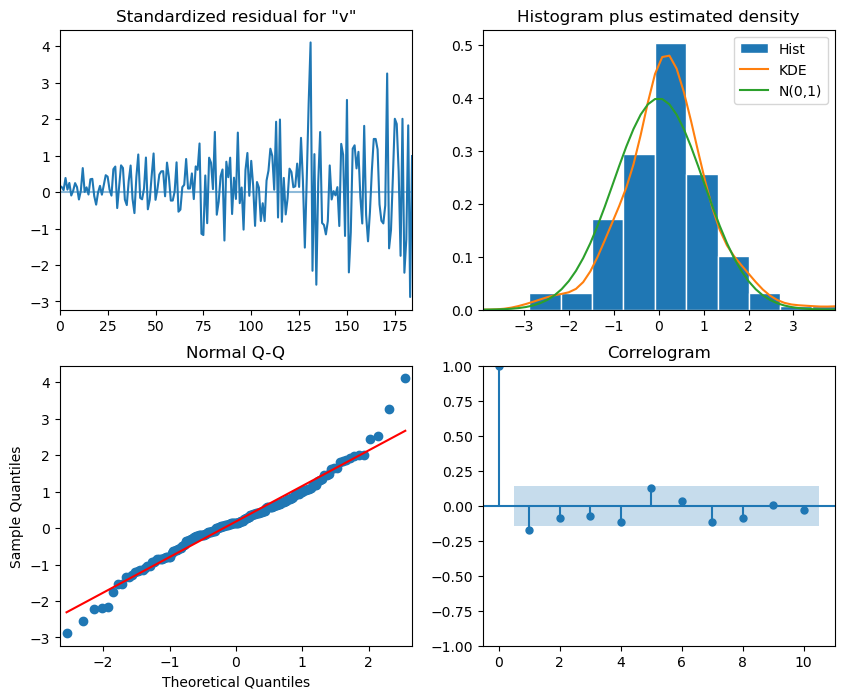

In [12]:
model_fit.plot_diagnostics(figsize=(10,8));

In [13]:
def ljung_box_test(residuals, is_seasonal, period):
    
    if is_seasonal:
        lb_df = acorr_ljungbox(residuals, period=period)
    else:
        max_lag = min([10, len(residuals)/5])
        
        lb_df = acorr_ljungbox(residuals, np.arange(1, max_lag+1, 1))

    fig, ax = plt.subplots()
    ax.plot(lb_df['lb_pvalue'], 'b-', label='p-values')
    ax.hlines(y=0.05, xmin=1, xmax=len(lb_df), color='black')
    plt.tight_layout()
    
    if all(pvalue > 0.05 for pvalue in lb_df['lb_pvalue']):
        print('All values are above 0.05. We fail to reject the null hypothesis. The residuals are uncorrelated')
    else:
        print('One p-value is smaller than 0.05')

All values are above 0.05. We fail to reject the null hypothesis. The residuals are uncorrelated


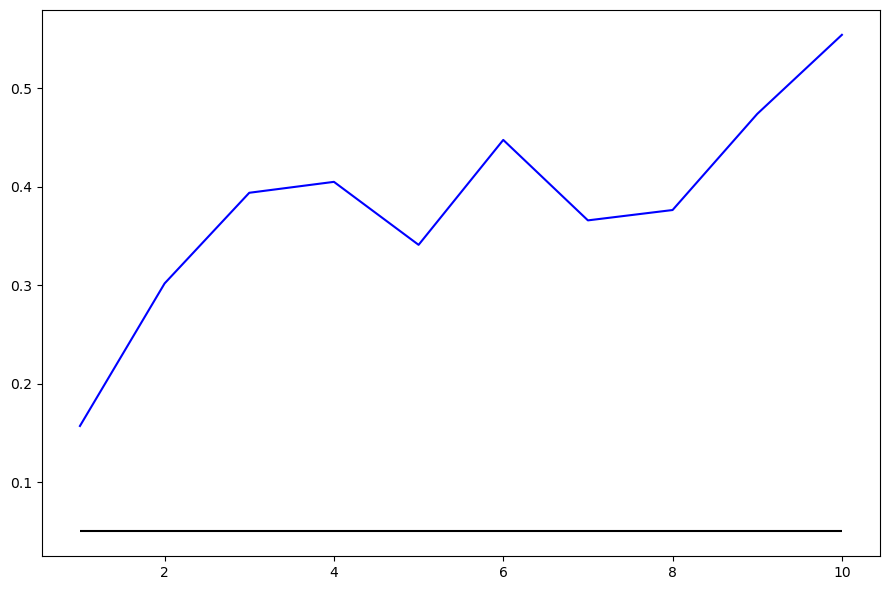

In [14]:
residuals = model_fit.resid

ljung_box_test(residuals, False, None)

#### Forecasting 

In [15]:
def rolling_predictions(df, train_len, horizon, window, period, method):
    
    TOTAL_LEN = train_len + horizon
    
    seasonal_steps = int((window/period))
    
    if method == 'mean':
        pred_mean = []
        
        for i in range(train_len, TOTAL_LEN, window):
            mean = np.mean(df[:i].values)
            pred_mean.extend(mean for _ in range(window))
        
        return pred_mean[:horizon]

    elif method == 'last':
        pred_last_value = []
        
        for i in range(train_len, TOTAL_LEN, window):
            last_value = diff[:i].iloc[-1].values[0]
            pred_last_value.extend(last_value for _ in range(window))

        return pred_last_value[:horizon]
    
    elif method == 'last_season':
        pred_last_season = []
        
        for i in range(train_len, TOTAL_LEN, window):
            last_season = df[:i][-period:].values
            pred_last_season.extend(last_season for _ in range(seasonal_steps))

        pred_last_season = np.array(pred_last_season).reshape(1, -1)
        
        return pred_last_season[0][:horizon]
    
    if method == 'ARIMA':
        pred_ARIMA = []
        
        for i in range(train_len, TOTAL_LEN, window):
            model = SARIMAX(df[:i], order=(4,1,4))
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            oos_pred = predictions.predicted_mean[-window:]
            pred_ARIMA.extend(oos_pred)
            
        return pred_ARIMA[:horizon]

In [16]:
pred_df = test.copy()

TRAIN_LEN = len(train)
HORIZON = len(test)

windows = [4, 8, 16, 32]

for window in windows:

    pred_mean = rolling_predictions(df['value'], TRAIN_LEN, HORIZON, window, 4, 'mean')
    pred_last_season = rolling_predictions(df['value'], TRAIN_LEN, HORIZON, window, 4, 'last_season')
    pred_ARIMA = rolling_predictions(df['value'], TRAIN_LEN, HORIZON, window, 4, 'ARIMA')

    pred_df[f'pred_mean_{window}'] = pred_mean
    pred_df[f'pred_last_season_{window}'] = pred_last_season
    pred_df[f'pred_ARIMA_{window}'] = pred_ARIMA

pred_df.head()

,time,value,pred_mean_4,pred_last_season_4,pred_ARIMA_4,pred_mean_8,pred_last_season_8,pred_ARIMA_8,pred_mean_16,pred_last_season_16,pred_ARIMA_16,pred_mean_32,pred_last_season_32,pred_ARIMA_32
187,2002.50,53.299,24.806237,52.226,53.107646,24.806237,52.226,53.107646,24.806237,52.226,53.107646,24.806237,52.226,53.107646
188,2002.75,51.646,24.806237,50.778,50.866892,24.806237,50.778,50.866892,24.806237,50.778,50.866892,24.806237,50.778,50.866892
189,2003.00,51.415,24.806237,50.639,51.717675,24.806237,50.639,51.717675,24.806237,50.639,51.717675,24.806237,50.639,51.717675
190,2003.25,51.379,24.806237,51.486,52.221404,24.806237,51.486,52.221404,24.806237,51.486,52.221404,24.806237,51.486,52.221404
191,2003.50,54.808,25.377363,53.299,53.313990,24.806237,52.226,53.822662,24.806237,52.226,53.822662,24.806237,52.226,53.822662


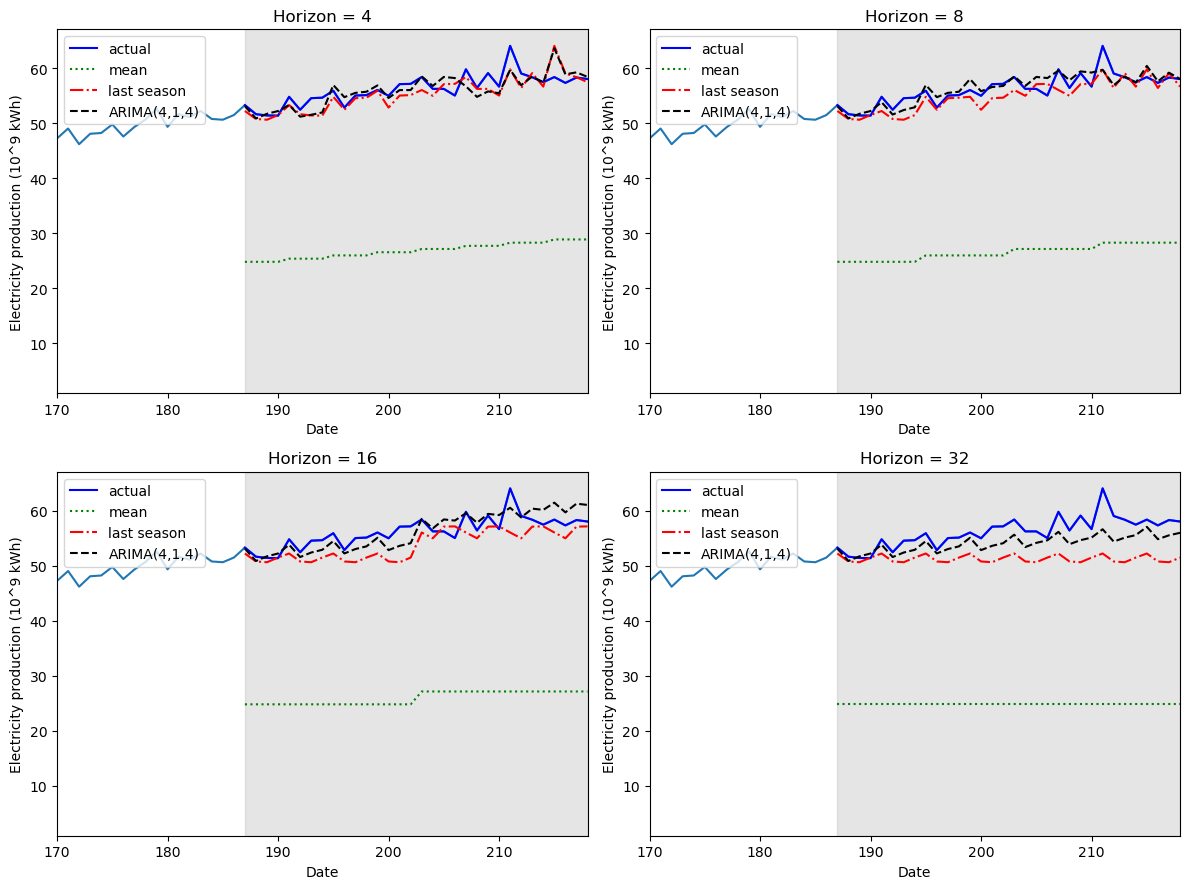

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,9))

for i, ax in enumerate(axes.flatten()):
    
    ax.plot(df['value'])
    ax.plot(pred_df['value'], 'b-', label='actual')
    ax.plot(pred_df[f'pred_mean_{windows[i]}'], 'g:', label='mean')
    ax.plot(pred_df[f'pred_last_season_{windows[i]}'], 'r-.', label='last season')
    ax.plot(pred_df[f'pred_ARIMA_{windows[i]}'], 'k--', label='ARIMA(4,1,4)')
    
    ax.legend(loc=2)
    ax.set_xlabel('Date')
    ax.set_ylabel('Electricity production (10^9 kWh)')
    ax.axvspan(187, 218, color='#808080', alpha=0.2)
    ax.set_xlim(170, 218)
    ax.set_title(f'Horizon = {windows[i]}')
    
plt.tight_layout()

#### Evaluation 

In [18]:
def mape(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)

In [19]:
mape_naive_seasonal_4 = mape(pred_df['value'], pred_df['pred_last_season_4'])
mape_ARIMA_4 = mape(pred_df['value'], pred_df['pred_ARIMA_4'])

mape_naive_seasonal_8 = mape(pred_df['value'], pred_df['pred_last_season_8'])
mape_ARIMA_8 = mape(pred_df['value'], pred_df['pred_ARIMA_8'])

mape_naive_seasonal_16 = mape(pred_df['value'], pred_df['pred_last_season_16'])
mape_ARIMA_16 = mape(pred_df['value'], pred_df['pred_ARIMA_16'])

mape_naive_seasonal_32 = mape(pred_df['value'], pred_df['pred_last_season_32'])
mape_ARIMA_32 = mape(pred_df['value'], pred_df['pred_ARIMA_32'])

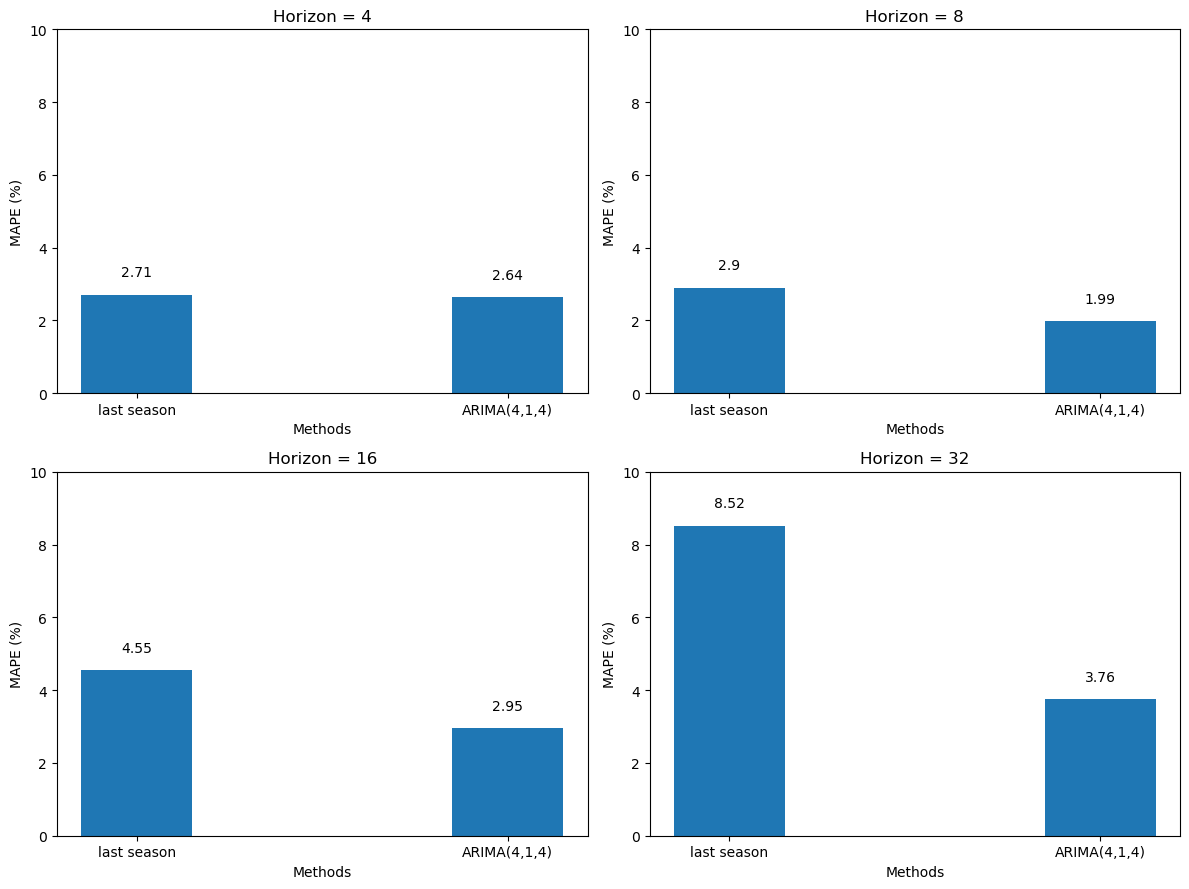

In [20]:
mapes_naive_seasonal = [mape_naive_seasonal_4, mape_naive_seasonal_8, mape_naive_seasonal_16, mape_naive_seasonal_32]
mapes_ARIMA = [mape_ARIMA_4, mape_ARIMA_8, mape_ARIMA_16, mape_ARIMA_32]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,9))

x = ['last season', 'ARIMA(4,1,4)']
width = 0.3

for i, ax in enumerate(axes.flatten()):
    
    y = [mapes_naive_seasonal[i], mapes_ARIMA[i]]
    ax.bar(x, y, width)
    ax.set_xlabel('Methods')
    ax.set_ylabel('MAPE (%)')
    ax.set_ylim(0, 10)
    ax.set_title(f'Horizon = {windows[i]}')    
    
    for index, value in enumerate(y):
        ax.text(x=index, y=value+0.5, s=str(value), ha='center')

plt.tight_layout()